# Explore Merchant & Products

In [6]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
merchant_order_df = pd.read_pickle('merchant_order.pkl')
print(merchant_order_df.shape)

merchant_order_df.head()

(33819106, 7)


order_id  user_id  order_number  order_hour_of_day  product_id  \
0   2539329        1             1                  8         196   
1   2539329        1             1                  8       14084   
2   2539329        1             1                  8       12427   
3   2539329        1             1                  8       26088   
4   2539329        1             1                  8       26405   

  purchase_date                              merchant  
0    2019-02-13  L&M Markets (Hometown Grocers Co-op)  
1    2019-02-13  L&M Markets (Hometown Grocers Co-op)  
2    2019-02-13  L&M Markets (Hometown Grocers Co-op)  
3    2019-02-13  L&M Markets (Hometown Grocers Co-op)  
4    2019-02-13  L&M Markets (Hometown Grocers Co-op)

In [3]:
merchant_product_df = pd.read_pickle('merchant_product.pkl')
print(merchant_product_df.shape)

merchant_product_df.head()

(1439026, 8)


merchant  product_id product_name  aisle_id  \
0  L&M Markets (Hometown Grocers Co-op)         196         Soda        77   
1                       Fairway Markets         196         Soda        77   
2                             Coleman's         196         Soda        77   
3                       Saskatoon Co-op         196         Soda        77   
4                     Asian Food Centre         196         Soda        77   

   department_id        aisle department  price  
0              7  soft drinks  beverages   3.08  
1              7  soft drinks  beverages   3.08  
2              7  soft drinks  beverages   3.08  
3              7  soft drinks  beverages   3.08  
4              7  soft drinks  beverages   3.08

In [56]:
all_order_df = merchant_order_df.merge(merchant_product_df[['merchant', 'product_id', 'product_name', 'price', 'aisle', 'department']], 
                                       on=['merchant', 'product_id'])
print(all_order_df.shape)

all_order_df.head()

(33819106, 11)


order_id  user_id  order_number  order_hour_of_day  product_id  \
0   2539329        1             1                  8         196   
1   2231262       31            17                 11         196   
2   3058369      195            34                 10         196   
3   2257155      951             3                 20         196   
4   1121647      992             7                 10         196   

  purchase_date                              merchant product_name  price  \
0    2019-02-13  L&M Markets (Hometown Grocers Co-op)         Soda   3.08   
1    2019-03-10  L&M Markets (Hometown Grocers Co-op)         Soda   3.08   
2    2019-02-25  L&M Markets (Hometown Grocers Co-op)         Soda   3.08   
3    2019-03-09  L&M Markets (Hometown Grocers Co-op)         Soda   3.08   
4    2019-03-08  L&M Markets (Hometown Grocers Co-op)         Soda   3.08   

         aisle department  
0  soft drinks  beverages  
1  soft drinks  beverages  
2  soft drinks  beverages  
3  soft drinks  beverages  
4  soft drinks  beverages

### Purchase Frequency Overview

The purpose of this check is just to understand an overview about purchase pattern, to see whether there is any abnormal pattern that might prevent a certain types of recommendations.

In [7]:
df_count = all_order_df[['product_id', 'order_number']].astype('str').drop_duplicates()\
          .groupby(['product_id'], as_index=False)['order_number']\
          .agg(['count']).reset_index()\
          .sort_values(['count'], ascending=False)

df_count.head()

product_id  count
13666      22298    100
24895      32403    100
2391        1215    100
5227       14702    100
44282       5134    100

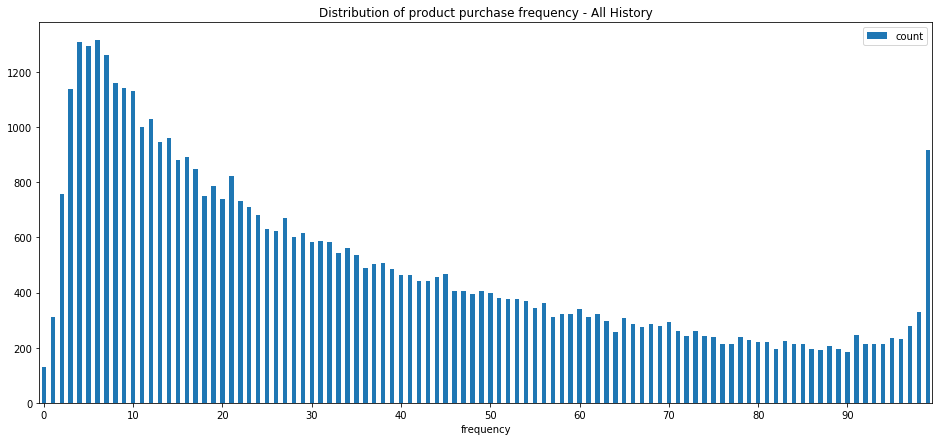

In [45]:
df_ct_ct = pd.DataFrame(df_count['count'].value_counts()).sort_index()
df_ct_ct['frequency'] = df_ct_ct.index

ax = df_ct_ct.plot.bar(x='frequency', y='count', rot=0, figsize=(16,7), xticks = np.arange(0, 100, step=10),
                      title='Distribution of product purchase frequency - All History')

The distribution here is showing:
* Most products are purchased within 10 times
* The number of products got purchased 100 times is also high

In [3]:
# to get the week of the year
all_order_df['week_number'] = all_order_df['purchase_date'].apply(lambda dt: dt.isocalendar()[1])
all_order_df.head()

order_id  user_id  order_number  order_hour_of_day  product_id  \
0   2539329        1             1                  8         196   
1   2231262       31            17                 11         196   
2   3058369      195            34                 10         196   
3   2257155      951             3                 20         196   
4   1121647      992             7                 10         196   

  purchase_date                              merchant product_name  price  \
0    2019-02-13  L&M Markets (Hometown Grocers Co-op)         Soda   3.08   
1    2019-03-10  L&M Markets (Hometown Grocers Co-op)         Soda   3.08   
2    2019-02-25  L&M Markets (Hometown Grocers Co-op)         Soda   3.08   
3    2019-03-09  L&M Markets (Hometown Grocers Co-op)         Soda   3.08   
4    2019-03-08  L&M Markets (Hometown Grocers Co-op)         Soda   3.08   

         aisle department  week_number  
0  soft drinks  beverages            7  
1  soft drinks  beverages           10  
2  soft drinks  beverages            9  
3  soft drinks  beverages           10  
4  soft drinks  beverages           10

In [10]:
# check purchase frequency
popularity_df = all_order_df[['product_id', 'order_id', 'week_number']].astype('str').drop_duplicates()\
                                                  .groupby(['product_id'], as_index=False)[['order_id', 'week_number']]\
                                                  .agg({'order_id': 'count', 'week_number': 'count'}).reset_index()
popularity_df.head()

index product_id  order_id  week_number
0      0          1      1928         1928
1      1         10      2691         2691
2      2        100       457          457
3      3       1000      2697         2697
4      4      10000        13           13

In [11]:
popularity_df['purchase_frequency'] = popularity_df['order_id']/popularity_df['week_number']
print(min(popularity_df['purchase_frequency']), max(popularity_df['purchase_frequency']))

1.0 1.0


I tried both weekly and daily purchase frequency, all are 1. This data is a bit special (hehe). So I cannot use purchase frequency to calculate the popularity.

In [4]:
sample_df1 = pd.read_pickle('sample_test_df1.pkl')
sample_df2 = pd.read_pickle('sample_test_df2.pkl')

print(min(sample_df1.index), max(sample_df1.index))
print(min(sample_df2.index), max(sample_df2.index))

2019-05-22 00:00:00 2019-06-04 00:00:00
2019-05-22 00:00:00 2019-06-02 00:00:00


In [8]:
date_threshold = datetime.datetime.strptime('2019-05-22', "%Y-%m-%d").date()

# all_order_train = all_order_df.loc[all_order_df['purchase_date'] < date_threshold]
all_order_test = all_order_df.loc[all_order_df['purchase_date'] >= date_threshold]

print(min(all_order_train['purchase_date']), max(all_order_train['purchase_date']))
print(min(all_order_test['purchase_date']), max(all_order_test['purchase_date']))

2019-02-11 2019-05-21
2019-05-22 2019-06-04


In [12]:
all_order_train.to_pickle('all_order_train.pkl')
all_order_test.to_pickle('all_order_test.pkl')

## Summary

* The data should be able to allow to apply differemt types of recommendations such as popularity recommendations, similarity recommendations and so on.
* The special case in this data is, product purchase frequency measured daily or weekly are all 1, so when calculating the popularity later, I cannot use the purchase frequency but have to use total purchase amount.